# USA population Medical Insurance Cost Regression Problem

The following data obtained from Kaggle, explain the cost of a small sample of USA population Medical Insurance Cost based on some attributes depicted on "Content".

In [39]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [40]:
insurance_df = pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
# checking for null value in tinsurance dataset

insurance_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## One Hot Encoding

In [43]:
# method one:
insurance_df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'],dtype=int, drop_first=True)
insurance_df.head()

# we have to delete some corr columns
# insurance_df = insurance_df.drop(['sex_female', 'smoker_no'], axis=1)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Features and Labels

In [44]:
# Seperate Dependent Variable charges and Features varables
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']


In [45]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [46]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


## Spliting Of Data Into Train And Test

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Building Artificial Neural Network (ANN)

In [48]:
tf.random.set_seed(42)

model = keras.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(100))
model.add(layers.Dense(1))


# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='linear'))


# model compile
model.compile(loss=keras.losses.mae, optimizer=keras.optimizers.SGD(), metrics=['mae'])

# model fit
model_one_history= model.fit(X_train, y_train, epochs=100)

# Socastic Gradient Descent update the weights and biases on sample data for example 1000 sample data it will update 1000 time per epoch and per epoch iteration is equal to batch-size in sgd is one so iteration is equal to number of sample 1000
# min-batch gradient descent update the weights and biase on spacific batch-size
# batch gradient descent update the weight and biase one per epoch

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9993.8223 - mae: 9993.8223  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7753.7188 - mae: 7753.7188
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7892.4858 - mae: 7892.4858
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7866.0967 - mae: 7866.0967
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7400.1479 - mae: 7400.1479
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7558.2080 - mae: 7558.2080
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7577.5244 - mae: 7577.5244
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7941.5796 - mae: 7941.5796
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7328.1948 - mae: 7328.1948
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7879.6465 - mae: 7879.6465
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7279.9067 - mae: 7279.9067
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [49]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,003 (3.92 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8051.3818 - mae: 8051.3818  
Test Loss: 7976.1577
Test MAE: 7976.1577


In [51]:

keras.losses.mae(y_test,tf.squeeze(model.predict(X_test)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<tf.Tensor: shape=(), dtype=float32, numpy=7976.1577>

In [52]:
# actual - predicted
y_train.mean() - 7756.0054

# this mean that when we have a charage of patrient is 13000 our model will predict charge of 6000 which is not good fit

5590.084336364485

## Model Performance
+ add hidden layer
+ increase number of neurons in hidden layer

In [53]:
tf.random.set_seed(42)

model_two = keras.Sequential()
model_two.add(keras.Input(shape=(X_train.shape[1],)))
model_two.add(layers.Dense(100)),
model_two.add(layers.Dense(10, activation='relu')),
model_two.add(layers.Dense(1))


# model_two.add(layers.Dense(64, activation='relu'))
# model_two.add(layers.Dense(1, activation='linear'))


# model_two compile
model_two.compile(loss=keras.losses.mae, optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

# model_two fit
model_two_history = model_two.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13254.9893 - mae: 13254.9893
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13126.2695 - mae: 13126.2695 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12870.5879 - mae: 12870.5879 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12385.5518 - mae: 12385.5518 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11561.4307 - mae: 11561.4307
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10383.5508 - mae: 10383.5508 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9074.4004 - mae: 9074.4004 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7976.0039 - mae: 7976.0039 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7476.5449 - mae: 7476.5449 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7388.3477 - mae: 7388.3477 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7363.3569 - mae: 7363.3569 
Epoch 12/500
34/34 ━━━━━━━━━━━━

In [54]:
# model two Evaluation
model_two.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2973.3030 - mae: 2973.3030  


[2964.078369140625, 2964.078369140625]

In [55]:
# model one Evaluation
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8051.3818 - mae: 8051.3818  


[7976.15771484375, 7976.15771484375]

## Visualize the model's training progress using the stats stored in the history object:

In [56]:
# model two visulization
hist = pd.DataFrame(model_two_history.history)
hist['epoch'] = model_two_history.epoch
hist.tail()

,loss,mae,epoch
495,3304.199463,3304.199463,495
496,3301.314697,3301.314697,496
497,3303.613281,3303.613281,497
498,3295.531250,3295.531250,498
499,3304.324463,3304.324463,499


In [57]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['mae'], label='mae')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()

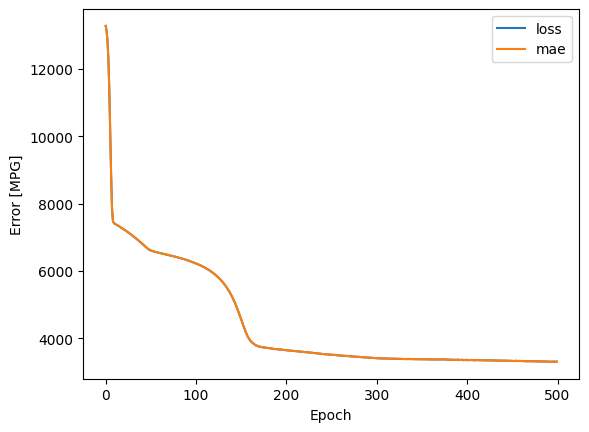

In [58]:
plot_loss(model_two_history)

In [59]:
# model one visualizaton

hist = pd.DataFrame(model_one_history.history)
hist['epoch'] = model_one_history.epoch
hist.tail()


,loss,mae,epoch
95,7543.674316,7543.674316,95
96,7356.804688,7356.804688,96
97,7449.106445,7449.106445,97
98,7528.663574,7528.663574,98
99,7549.013672,7549.013672,99


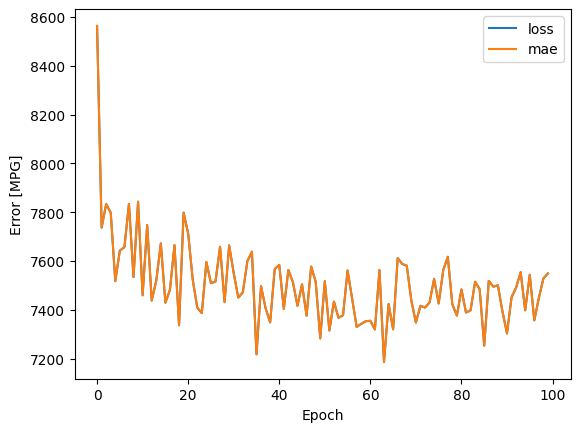

In [60]:
plot_loss(model_one_history)

## Preprocessing Data (Normalization & Standardization)

In [61]:
# Normalization: '
# scale the value in the range of 0 and 1 while preserving the original distribution of the sample
# scale the feature to mean of zero and standard deviation of one (this reduce the effect of the outliers)

In [62]:
tf.random.set_seed(42)

model_two = keras.Sequential()
model_two.add(keras.Input(shape=(X_train.shape[1],)))
model_two.add(layers.Dense(100)),
model_two.add(layers.Dense(10, activation='relu')),
model_two.add(layers.Dense(1))


# normalization of Data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))



# model_two compile
model_two.compile(loss=keras.losses.mae, optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

# model_two fit
model_two_history = model_two.fit(normalizer(X_train), y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13298.3916 - mae: 13298.3916 
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13297.1270 - mae: 13297.1270 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13295.4219 - mae: 13295.4219 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13292.4131 - mae: 13292.4131 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13287.1123 - mae: 13287.1123 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13278.1436 - mae: 13278.1436
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13263.5674 - mae: 13263.5674
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13241.5352 - mae: 13241.5352 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13210.7764 - mae: 13210.7764
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13170.3096 - mae: 13170.3096 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13119.1152 - mae: 13119.1152 
Epoch 12/500
34/34 ━━━

In [63]:
# model two Evaluation
model_two.evaluate(normalizer(X_test), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2074.3022 - mae: 2074.3022  


[2206.626220703125, 2206.626220703125]

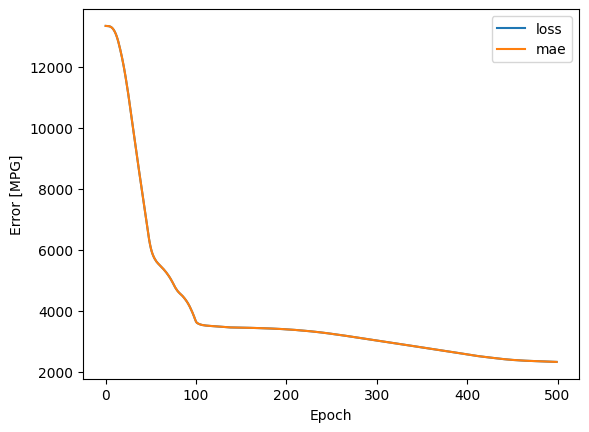

In [64]:
plot_loss(model_two_history)

## Min-Max Normalization

In [65]:
# minMax scaling in sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()




tf.random.set_seed(42)

model_two = keras.Sequential()
model_two.add(keras.Input(shape=(X_train.shape[1],)))
model_two.add(layers.Dense(100)),
model_two.add(layers.Dense(10, activation='relu')),
model_two.add(layers.Dense(1))


# normalization of Data
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))



# model_two compile
model_two.compile(loss=keras.losses.mae, optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

# model_two fit
model_two_history = model_two.fit(normalizer(X_train), y_train, epochs=500)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13298.3311 - mae: 13298.3311 
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13295.6934 - mae: 13295.6934 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13290.0869 - mae: 13290.0869 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13278.2305 - mae: 13278.2305 
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13256.9795 - mae: 13256.9795
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13223.3027 - mae: 13223.3027 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13174.2168 - mae: 13174.2168
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13106.8799 - mae: 13106.8799 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13018.6133 - mae: 13018.6133
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12906.8164 - mae: 12906.8164
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12768.9717 - mae: 12768.9717
Epoch 12/500
34/34 ━━━━━

In [66]:
# model two Evaluation
model_two.evaluate(X_test_scaled, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3213.8406 - mae: 3213.8406  


[3160.326904296875, 3160.326904296875]

## Standardization mean of zero and variance of one (Reduce the effect of outliers)

In [67]:
# standardization of data using sklearn
from sklearn.preprocessing import StandardScaler



tf.random.set_seed(42)

model_two = keras.Sequential()
model_two.add(keras.Input(shape=(X_train.shape[1],)))
model_two.add(layers.Dense(100)),
model_two.add(layers.Dense(10, activation='relu')),
model_two.add(layers.Dense(1))

# Standardization of data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



# model_two compile
model_two.compile(loss=keras.losses.mae, optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mae'])

# model_two fit
model_two_history = model_two.fit(X_train_scaled, y_train, epochs=500)


Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13298.2646 - mae: 13298.2646
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13296.8594 - mae: 13296.8594 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13295.0566 - mae: 13295.0566 
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13292.1436 - mae: 13292.1436
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13287.3662 - mae: 13287.3662 
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13279.8154 - mae: 13279.8154 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13268.4961 - mae: 13268.4961 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13252.3633 - mae: 13252.3633 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13230.3213 - mae: 13230.3213 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13201.0293 - mae: 13201.0293 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13162.5508 - mae: 13162.5508 
Epoch 12/500
34/34 ━━

In [68]:
# model two Evaluation
model_two.evaluate(X_test_scaled, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1865.0928 - mae: 1865.0928  


[1997.7392578125, 1997.7392578125]

## ColumnTransformer:
The columnTransformer is a class in sklarn that help use to apply different preprocessiong method on the different columns our dataset. For example age columns apply normailation and for sex onehotencode etc

In [88]:
# categorical encoding

df =pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,OrdinalEncoder

#  columntransformer is used for the apply different scaling method on different column
ct = ColumnTransformer(transformers=[
    ('scale', MinMaxScaler(), ['age', 'bmi', 'children']),   # convert the data into the range of 0 and 1
    ('onehot',OrdinalEncoder(), ['sex', 'smoker', 'region']),  # onehotencoding the categorical features
])


X_train,X_test, y_train, y_test = train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.2, random_state=42)

ct.fit(X_train) # only fit the training data

X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)












In [90]:
X_train_scaled

array([[0.60869565, 0.10734463, 0.4       , 0.        , 0.        ,
        1.        ],
       [0.63043478, 0.22491256, 0.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 0.        , 0.        ,
        2.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , 1.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , 0.        , 1.        ,
        3.        ],
       [0.80434783, 0.37503363, 0.        , 1.        , 0.        ,
        3.        ]])

In [91]:
# creating model
model = keras.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(100))
model_two.add(layers.Dense(10)),
model.add(layers.Dense(1))

#  compile modle
model.compile(
    loss=keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(0.01),
    # SGD is a socastic Gradient descent is a loss optimizer function in which it update the weight and biase after each training exmapl
    # Batch Gradient Descent: update weights and biase after predict all training examples
    # Stochastic Gradinet Descent: update weights and biase on every training example
    # Min-batch Gradient Descent  update weights and biase on a specific number batch-size
    # stochastic and min-batch gradient descent work same that random  select the training elements


    metrics=['mae']
)

# fit model
model.fit(X_train_scaled, y_train, epochs=500)





Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13288.9922 - mae: 13288.9922
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13179.0020 - mae: 13179.0020
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12854.7959 - mae: 12854.7959
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12268.8086 - mae: 12268.8086
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11473.9365 - mae: 11473.9365
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10598.4492 - mae: 10598.4492
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9737.8994 - mae: 9737.8994
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8984.7559 - mae: 8984.7559
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8429.1016 - mae: 8429.1016
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8100.1953 - mae: 8100.1953
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7906.2124 - mae: 7906.2124
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [85]:
model.evaluate(X_test_scaled, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3330.0029 - mae: 3330.0029  


[3263.6201171875, 3263.6201171875]